# Stability of a Multistep method

#### John S Butler 
john.s.butler@tudublin.ie 

[Course Notes](https://johnsbutler.netlify.com/files/Teaching/Numerical_Analysis_for_Differential_Equations.pdf)    [Github](https://github.com/john-s-butler-dit/Numerical-Analysis-Python)

## Overview
A one-step or multistep method is used to approximate the solution of an initial value problem of the form
$$ \frac{dy}{dt}=f(t,y), $$
with the initial condition
$$ y(a)=\alpha.$$
The method should only be used if it satisfies the three criteria:
1. that difference equation is consistent with the differential equation;
2. that the numerical solution converges to the exact answer of the differential equation;
3. that the numerical solution is stable.

In the notebooks in this folder we will illustate examples of consistent and inconsistent, convergent and non-convergent, and stable and unstable methods. 

This notebook focuses on stable and unstable methods. The video below outlines the notebook.

In [4]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/c0Gr5mM3Np0" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Introduction to unstable
This notebook illustrates an unstable multistep method for numerically approximating an initial value problem
$$ \frac{dy}{dt}=f(t,y), $$
with the initial condition
$$ y(a)=\alpha,$$
using the Modified Abysmal Kramer-Butler method. The method is named after the great [Cosmo Kramer]( https://en.wikipedia.org/wiki/Cosmo_Kramer) and myself [John Butler](https://johnsbutler.netlify.com).

## 2-step Abysmal Kramer-Butler Method

The 2-step Abysmal Kramer-Butler difference equation is given by
$$w_{i+1} = w_{i-1} + h(4f(t_i,w_i)-2f(t_{i-1},w_{i-1})) $$
by changing $F$, the Modified Abysmal Butler Method (see convergent and consistent notebooks), the Abysmal Kramer-Butler method is consistent with the differential equation and convergent with the exact solution (see below for proof).
But the most important thing is that method is weakly stable, it fluctuates widely around the exact answer, just like it's name sake Kramer (for examples see any Seinfeld episode).

## Definition of Stability
The stability of a numerical method is not as tangable as consistency and convergence but when you see an unstable solution it is obvious.


To determine the stabilty of a multistep method we need three definitions:


### Definition: Characteristic Equation
Associated with the difference equation 
$$ w_0=\alpha \ \ \ w_1=\alpha_1 \ \ \ ... \ \ \ w_{m-1}=\alpha_{m-1} $$
$$w_{i+1} = a_{m-1}w_{i}+a_{m-2}w_{i-1}+...+a_{0}w_{i+1-m} +hF(t_i,h,w_{i+1},...,w_{i+1-m}),$$
is the __characteristic equation__ given by
$$\lambda^{m} - a_{m-1}\lambda^{m-1}-a_{m-2}\lambda^{m-2}-...-a_{0} =0. $$

### Definition: Root Condition 

Let $\lambda_1,...,\lambda_m$ denote the roots of the that characteristic equation
$$\lambda^{m} - a_{m-1}\lambda^{m-1}-a_{m-2}\lambda^{m-2}-...-a_{0} =0 $$
associated with the multi-step difference method
$$ w_0=\alpha \ \ \ w_1=\alpha_1 \ \ \ ... \ \ \ w_{m-1}=\alpha_{m-1} $$
$$ w_{i+1} = a_{m-1}w_{i}+a_{m-2}w_{i-1}+...+a_{0}w_{i+1-m} +hF(t_i,h,w_{i+1},...,w_{i+1-m}),$$
If $|\lambda_{i}|\leq 1$ for each $i=1,...,m$ and all roots with absolute value 1
are simple roots then the difference equation is said to satisfy the __root condition__.

### Definition: Stability
1. Methods that satisfy the root condition and have $\lambda=1$ as the only root 
of the characteristic equation of magnitude one and all other roots are 0 are called __strongly stable__;
2. Methods that satisfy the root condition and have more than one distinct root
with magnitude one are called __weakly stable__;
3. Methods that do not satisfy the root condition are called __unstable__.

All one step methods, Adams-Bashforth and Adams-Moulton methods are all stongly stable.



## Intial Value Problem
To illustrate stability we will apply the method to a linear intial value problem given by
$$ y^{'}=t-y, \ \ (0 \leq t \leq 2), $$
with the initial condition
$$y(0)=1,$$
with the exact solution
$$y(t)= 2e^{-t}+t-1.$$

## Python Libraries

In [1]:
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

### Defining the function
$$ f(t,y)=t-y.$$

In [2]:
def myfun_ty(t,y):
    return t-y

## Discrete Interval
Defining the step size  $h$  from the interval range  $a \leq t \leq b$  and number of steps  $N$ 
$$h=\frac{b-a}{N}.$$
 
This gives the discrete time steps,
$$t_i=t_0+ih,$$
where  $t_0=a.$

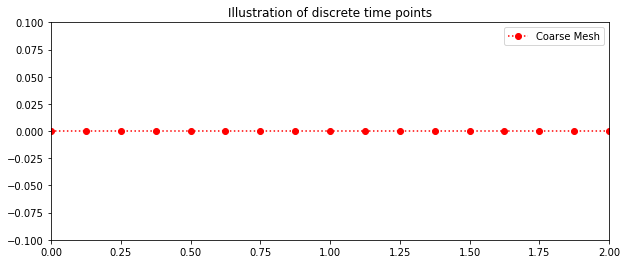

In [3]:
# Start and end of interval
b=2
a=0
# Step size
N=16
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red',label='Coarse Mesh')
plt.xlim((0,2))
plt.ylim((-0.1,.1))

plt.legend()
plt.title('Illustration of discrete time points')
plt.show()

## 2-step  Abysmal Kramer-Butler Method

For this initial value problem 2-step Abysmal Kramer-Butler difference equation is
$$w_{i+1} = w_{i-1} + h(4(t_i- w_i)-2(t_{i-1}-w_{i-1})) $$
by changing $F$, the Modified Abysmal Butler Method, is consistent and convergent.

For $i=0$ the system of difference equation is:
$$w_{1} = w_{-1} + h(4(t_0-w_0)-2(t_{-1}-w_{-1})) $$
this is not solvable as <font color='red'> $w_{-1}$ </font> is unknown.

For $i=1$ the difference equation is:
$$w_{2} = w_{0} + h(4(t_1-w_1)-2(t_{0}-w_{0})) $$
this is not solvable as <font color='red'> $w_{1}$  </font> is unknown. $w_1$ can be  approximated using a one step method. Here, as the exact solution is known,
$$w_1=2e^{-t_1}+t_1-1.$$


In [4]:
### Initial conditions
IC=1
w=np.zeros(len(t))
y=(2)*np.exp(-t)+t-1
w[0]=IC
w[1]=y[1]

### Loop

In [5]:
for i in range (1,N):
    w[i+1]=(w[i-1]+h*(4*myfun_ty(t[i],w[i])-2*myfun_ty(t[i-1],w[i-1])))   


### Plotting solution

In [9]:
def plotting(t,w,y):
    
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,w,'^:',color='red',label='Abysmal Kramer-Butler (N)')
    plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.xlabel('time')
    plt.legend()
    plt.title(' Abysmal Kramer-Butler')
    plt.show 

The plot below shows the Abysmal Kramer-Butler approximation $w_i$ (red) and the exact solution $y(t_i)$ (black) of the intial value problem. 

The numerically solution initially approximates the exact solution $(t<.5)$ reasonably but then the instability creeps in such that the numerical approximation starts to widely oscilate around the exact solution.

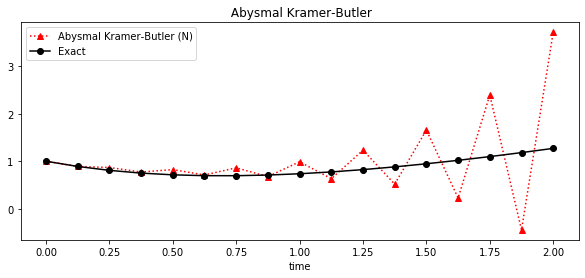

In [10]:
plotting(t,w,y)

The table below illustrates the absolute error and the signed error of the numerical method.

In [8]:
n=10
d = {'time': t[0:n], 'Abysmal Kramer-Butler w': w[0:n],'Exact Error abs':np.abs(y[0:n]-w[0:n]),
     'Exact Error':(y[0:n]-w[0:n])}
df = pd.DataFrame(data=d)
df

,time,Abysmal Kramer-Butler w,Exact Error abs,Exact Error
0,0.000,1.000000,0.000000,0.000000
1,0.125,0.889994,0.000000,0.000000
2,0.250,0.867503,0.059902,-0.059902
3,0.375,0.772491,0.022912,-0.022912
4,0.500,0.823134,0.110072,-0.110072
5,0.625,0.710297,0.014774,-0.014774
6,0.750,0.861269,0.166535,-0.166535
7,0.875,0.675986,0.032738,0.032738
8,1.000,0.988592,0.252834,-0.252834
9,1.125,0.631937,0.142368,0.142368


# Theory
## Consistent 
The Abysmal Kramer-Butler method does satisfy the consistency condition
$$\tau_{i}(h)=\frac{y_{i+1}-y_{i-1}}{2h}-\frac{1}{2}[4(f(t_i,y_i)-2f(t_{i-1},y_{i-1})] $$
As $h \rightarrow 0$  $$\frac{1}{2}[4(f(t_i,y_i)-2f(t_{i-1},y_{i-1})] \rightarrow f(t_i,y_i).$$
While as $h \rightarrow 0$  $$\frac{y_{i+1}-y_{i-1}}{2h} \rightarrow \frac{y^{'}}{1}=\frac{f(t_i,y_i)}{1}.$$
Hence as $h \rightarrow 0$ $$\frac{y_{i+1}-y_{i}}{h}-\frac{1}{2}[4(f(t_i,y_i)-2f(t_{i-1},y_{i-1})]\rightarrow f(t_i,y_i)-f(t_i,y_i)=0,$$
which means it is consistent.

## Convergent 
The Abysmal Kramer-Butler method does satisfy the Lipschitz condition:
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}f(t,w_i)-\frac{2}{2}f(t-h,w_{i-1}))-(\frac{4}{2}f(t,\hat{w}_{i})-\frac{2}{2}f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)=\frac{4}{2}(f(t,w_i)-f(t,\hat{w}_i))-\frac{2}{2}(f(t-h,w_{i-1}))-f(t-h,\hat{w}_{i-1})))$$
$$F(t,w:h)-F(t,\hat{w}:h)\leq\frac{4}{2}L|w_i-\hat{w_i}|+\frac{2}{2}L|w-\hat{w}|\leq \frac{6}{2} L|w_i-\hat{w_i}|$$
This means it is internally convergent,
$$|w_i-\hat{w_i}|\rightarrow 0$$ 
as $h \rightarrow 0$.
## Stability
The Abysmal Kramer-Butler method does __not__ satisfy the stability condition.
The characteristic equation of the 
$$w_{i+1} = w_{i-1} + h(4f(t_i,w_i)-2f(t_{i-1},w_{i-1})) $$
is
$$\lambda^2 = 1, $$
This has two roots $\lambda=1$ and   $\lambda=-1$, hence the method is weakly stable.